In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

L          = 5e-10
hbar       = 1.0546e-34
electron_M = 9.1094e-31
a          = 10*1.6022e-19

Part a

$H\Psi=E\Psi$

$A\Psi=\lambda\Psi$

$$
\begin{bmatrix} 
\frac{L^2}{4} & -(\frac{2L}{\pi})^{2}\frac{mn}{(m^2-n^2)} \\
-(\frac{2L}{\pi})^{2}\frac{mn}{(m^2-n^2)} & \frac{L^2}{4} & -(\frac{2L}{\pi})^{2}\frac{mn}{(m^2-n^2)} \\
0 & -(\frac{2L}{\pi})^{2}\frac{mn}{(m^2-n^2)} & \frac{L^2}{4} & -(\frac{2L}{\pi})^{2}\frac{mn}{(m^2-n^2)} \\
-(\frac{2L}{\pi})^{2}\frac{mn}{(m^2-n^2)} & 0 & -(\frac{2L}{\pi})^{2}\frac{mn}{(m^2-n^2)} & \frac{L^2}{4} & -(\frac{2L}{\pi})^{2}\frac{mn}{(m^2-n^2)} \\
...&...&...&...&...\\
-(\frac{2L}{\pi})^{2}\frac{mn}{(m^2-n^2)}&0&-(\frac{2L}{\pi})^{2}\frac{mn}{(m^2-n^2)}&0&-(\frac{2L}{\pi})^{2}\frac{mn}{(m^2-n^2)}&\frac{L^2}{4}
\end{bmatrix}
·
\begin{bmatrix}
\Psi_0\\
\Psi_1\\
\Psi_2\\
...\\
...\\
\Psi_n
\end{bmatrix}
=
\begin{bmatrix}
\lambda_0 \\
0 & \lambda_1 \\
0 & 0 & \lambda_2 \\
... & ... & ... & ... \\
0 & 0 & 0 & 0 & \lambda_n \\
\end{bmatrix}
·
\begin{bmatrix}
\Psi_0\\
\Psi_1\\
\Psi_2\\
...\\
...\\
\Psi_n
\end{bmatrix}
$$

$$
\sum_{n=1}^{\infty} \Psi_n \int_{0}^{L} sin(\frac{n\pi x}{L}) \hat{H} sin(\frac{n\pi x}{L}) dx = \frac{1}{2} LE\Psi m 
$$

$$
\hat{H}\Psi(x)=E\Psi=\hat{H}\sum_{n=1}^{\infty}(\Psi_n)\sqrt{\frac{2}{L}}sin(\frac{n\pi x}{L})
$$

$$
\hat{H}\Psi(x)= E\Psi=\frac{2}{L}\int_{0}^{L}sin(\frac{m\pi x}{L})\hat{H}\sum_{m=0}^{\infty}\sqrt{\frac{2}{L}}sin(\frac{n\pi x}{L})dx 
$$

In [2]:
#Part b

def Make_Hamiltonian_Array(size):
    H = np.zeros([size,size])
    for m in range(size):
        for n in range(size):
            if m==n:
                H[m,n] = (2/L)*(np.pi**2 * hbar**2 * n**2)/(2 * electron_M * L**2)*(1.6022 * 10 ** -19) + (a/2)
                H[m,n] += (2/L)*(a*L/4)
            elif m != n:
                if (m%2==0 and n%2==0) or (m%2!=0 and n%2!=0):
                    H[m,n] = 0
                else:
                    H[m,n] = -(2/L)*(a/L)*((2*L) / (np.pi))**2 *( ((m+1)*(n+1)) / ((m+1)**2 - (n+1)**2)**2)
    return H

H=Make_Hamiltonian_Array(10)
Eigvals, Eigvecs = np.linalg.eigh(H)

print("Eigenvalues: ")
print(Eigvals*(6.242e18))
print("Eigenvectors:")
print(np.around(Eigvecs,2))

Eigenvalues: 
[ 5.81911955  6.74922456  7.678943    8.60800491  9.53666695 10.46519791
 11.39385994 12.32292185 13.2526403  14.18274531]
Eigenvectors:
[[-0.11  0.23  0.32  0.39 -0.43  0.43 -0.39 -0.32  0.23 -0.11]
 [-0.21  0.39  0.43  0.33 -0.12 -0.12  0.33  0.43 -0.39  0.21]
 [-0.3   0.43  0.25 -0.11  0.39 -0.39  0.11 -0.25  0.43 -0.3 ]
 [-0.36  0.35 -0.1  -0.42  0.24  0.24 -0.42 -0.1  -0.35  0.36]
 [-0.4   0.17 -0.38 -0.25 -0.32  0.32  0.25  0.38  0.17 -0.4 ]
 [-0.42 -0.06 -0.41  0.22 -0.33 -0.33  0.22 -0.41  0.06  0.42]
 [-0.4  -0.27 -0.17  0.43  0.23 -0.23 -0.43  0.17 -0.27 -0.4 ]
 [-0.35 -0.4   0.18  0.16  0.4   0.4   0.16  0.18  0.4   0.35]
 [-0.28 -0.4   0.4  -0.3  -0.11  0.11  0.3  -0.4  -0.4  -0.28]
 [-0.17 -0.26  0.33 -0.37 -0.4  -0.4  -0.37  0.33  0.26  0.17]]


$$
V(x)=\frac{ax}{L}
$$

$$
H_{mn}=\int_{0}^{L}sin(\frac{m\pi x}{L})[\frac{-\hbar^2}{2M}\frac{d^2}{dx^2}+\frac{ax}{L}]sin(\frac{n\pi x}{L}) dx
$$

$$
H_{mn}=\int_{0}^{L}[sin(\frac{m\pi x}{L})\frac{-\hbar^2}{2M}\frac{d^2}{dx^2}sin(\frac{m\pi x}{L})+\frac{ax}{L}sin(\frac{n\pi x}{L})] dx
$$

$$
(\frac{\hbar^2\pi^2n^2}{2ML^2})\int_{0}^{L}x sin(\frac{m\pi x}{L})sin(\frac{n\pi x}{L})
$$

$$
=\frac{a}{L} 
\left\{
\begin{array}{ll}
      0 & \text{, if m\neq n, and both are even/odd} \\
      -(\frac{2L}{\pi})^{2}\frac{mn}{(m^2-n^2)}, & \text{, if both are even/odd} \\
      L^2/4 & \text{, m=n} \\
\end{array} 
\right.
$$

In [3]:
#Part c

H_10 = Make_Hamiltonian_Array(10)

Evals, Evecs = np.linalg.eigh(H_10)

print("Eigenvalues: ")
print(Evals*(6.242e18))
print("Eigenvectors:")
print(Evecs)

Eigenvalues: 
[ 5.81911955  6.74922456  7.678943    8.60800491  9.53666695 10.46519791
 11.39385994 12.32292185 13.2526403  14.18274531]
Eigenvectors:
[[-0.10795589  0.22577631  0.32114907  0.39050504 -0.42630937  0.42630937
  -0.39050504 -0.32114906  0.2257763  -0.10795588]
 [-0.2085485   0.38544237  0.4276829   0.33132134 -0.12351198 -0.12351199
   0.33132135  0.42768291 -0.38544236  0.20854849]
 [-0.29512782  0.43196604  0.24867375 -0.1095867   0.39045746 -0.39045746
   0.10958668 -0.24867377  0.43196604 -0.29512781]
 [-0.36139785  0.35249947 -0.09748099 -0.42287386  0.23835032  0.23835034
  -0.42287386 -0.09748096 -0.35249948  0.36139784]
 [-0.40318163  0.16998088 -0.37912883 -0.24845022 -0.32106836  0.32106834
   0.24845024  0.37912882  0.16998091 -0.40318162]
 [-0.4164414  -0.0600353  -0.41065447  0.21530678 -0.32860039 -0.32860041
   0.21530675 -0.41065448  0.06003527  0.4164414 ]
 [-0.40075796 -0.27090643 -0.16937749  0.43165078  0.22581328 -0.22581325
  -0.43165078  0.16937753

In [4]:
#Part d

H_100=Make_Hamiltonian_Array(100)

Evals, Evecs = np.linalg.eigh(H_100)

print("Eigenvalues: ")
print(Evals*(6.242e18))
print("Eigenvectors:")
print(Evecs)

Eigenvalues: 
[ 5.08755971  5.18674088  5.28602152  5.38531536  5.48461059  5.58390437
  5.68319586  5.78248482  5.88177125  5.98105521  6.08033679  6.17961609
  6.27889324  6.37816834  6.47744148  6.57671278  6.67598231  6.77525018
  6.87451646  6.97378124  7.07304459  7.17230658  7.27156728  7.37082675
  7.47008507  7.56934229  7.66859846  7.76785365  7.86710791  7.96636129
  8.06561383  8.1648656   8.26411663  8.36336698  8.46261668  8.56186579
  8.66111434  8.76036237  8.85960994  8.95885707  9.05810381  9.1573502
  9.25659627  9.35584206  9.45508762  9.55433297  9.65357817  9.75282323
  9.8520682   9.95131312 10.05055802 10.14980293 10.24904791 10.34829297
 10.44753816 10.54678351 10.64602907 10.74527487 10.84452094 10.94376732
 11.04301406 11.1422612  11.24150876 11.3407568  11.44000535 11.53925445
 11.63850415 11.7377545  11.83700553 11.9362573  12.03550985 12.13476322
 12.23401748 12.33327267 12.43252885 12.53178606 12.63104438 12.73030386
 12.82956456 12.92882655 13.02808989 1

1.0013750000000001
1.001375
1.0013750000000001


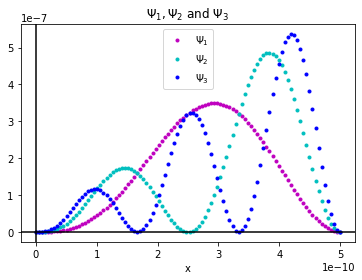

In [5]:
#Part e

H_100=Make_Hamiltonian_Array(100)

Evals, Evecs = np.linalg.eigh(H_100)

x=np.linspace(0,L,len(Evecs))
factor=((hbar**2)*(np.pi**2))/(electron_M*(L**3))

#def f_Psi_1(x):
#    return (2/(L))*(1*factor*((np.sin(1*np.pi*x/L))**2)+((2*a*x/L**2)*(np.sin(1*np.pi*x/L))**2))
#def f_psi_2(x):
#    return (2/(L))*(4*factor*((np.sin(2*np.pi*x/L))**2)+((2*a*x/L**2)*(np.sin(2*np.pi*x/L))**2))
#def f_psi_3(x):
#    return (2/(L))*(9*factor*((np.sin(3*np.pi*x/L))**2)+((2*a*x/L**2)*(np.sin(3*np.pi*x/L))**2))

def Plot_WaveFunc(state):
    y=np.zeros(len(x))
    array=np.zeros([len(x),len(x)])
    for i in range(len(x)):
        for j in range(len(x)):
#            array[i,j]=(2/L)*(((state+1)**2)*factor*Evals[j]*Evecs[state,j]*((np.sin((state+1)*np.pi*x[i]/L))**2)+((2*a*x[i]/L**2)*(np.sin((state+1)*np.pi*x[i]/L))**2))
            array[i,j]=(((state+1)**2)*factor*Evals[j]*Evecs[i,j]*((np.sin((state+1)*np.pi*x[i]/L))**2)+((2*a*x[i]/L**2)*(np.sin((state+1)*np.pi*x[i]/L))**2))
        y[i]=sum(array[i,:])
    return(y)

y1=Plot_WaveFunc(0)
y2=Plot_WaveFunc(1)
y3=Plot_WaveFunc(2)

#Ground State
psi_0=(2/L)*1*factor*((np.sin(1*np.pi*x/L))**2)+((2*a*x/L**2)*(np.sin(1*np.pi*x/L))**2)
#First Excited State
psi_1=(2/L)*4*factor*((np.sin(2*np.pi*x/L))**2)+((2*a*x/L**2)*(np.sin(2*np.pi*x/L))**2)
#Second Excited State
psi_2=(2/L)*9*factor*((np.sin(3*np.pi*x/L))**2)+((2*a*x/L**2)*(np.sin(3*np.pi*x/L))**2)

print((1.25e16)*np.trapz(y1,x=x))
print((1.25e16)*np.trapz(y2,x=x))
print((1.25e16)*np.trapz(y3,x=x))

#print((3.12071e6)*np.trapz(y1,x=x))
#print((3.12071e6)*np.trapz(y2,x=x))
#print((3.12071e6)*np.trapz(y3,x=x))

plt.plot(x,y1,'m.',label="$\Psi_1$")
plt.plot(x,y2,'c.',label="$\Psi_2$")
plt.plot(x,y3,'b.',label="$\Psi_3$")
plt.title("$\Psi_1,\Psi_2$" + " and " + "$\Psi_3$")
plt.legend()
plt.axhline(color='k')
plt.axvline(color='k')
plt.xlabel("x")
plt.show()